### Header
Author : Amina Matt and Younes Moussaif  
Date created : 30.11.2021  
Date last modified : 17.12.2021  
Description : Investigation of all quotes and subset at time of interest (post When do people talk about women's rights and gender equality? on website)

# When do people talk about women's rights and gender equality?

Packages required to run this notebook :
- texblob : conda install -c conda-forge textblob
- nltk: conda install -c anaconda nltk
- flair: pip install flair

### Librairies

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import random

#for natural language processing
import nltk #Natural Language Toolkit is a natural language programming library
from nltk.tokenize import word_tokenize
nltk.download('stopwords') #common english words to ignore 
stopwords = nltk.corpus.stopwords.words('english') #list of words such as a, the, and etc..

#for sentiment calculation 
#Vader
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
PATH = 'generated_data/'
pd.options.display.max_colwidth = 350

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Younes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence

## Load dataframe of all quotes about women's rights and gender equality

In [3]:
# Concatenate into one dataframes the dataframes from each pickle file. 
dataframesNames = ('QOI_2015_DF','QOI_2016_DF','QOI_2017_DF','QOI_2018_DF','QOI_2019_DF','QOI_2020_DF')
df = pd.concat([pd.read_pickle(PATH+ fp +'.pkl') for fp in dataframesNames], ignore_index=True)

In [3]:
#df.head()

## Sentiment

In [32]:
quote = df['quotation'].iloc[0]
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(df['quotation'].loc[1])
df['sentiment'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])

/var/folders/3v/cd3_rvz10bd1jd08x0c03tpr0000gt/T/ipykernel_25334/2816934022.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


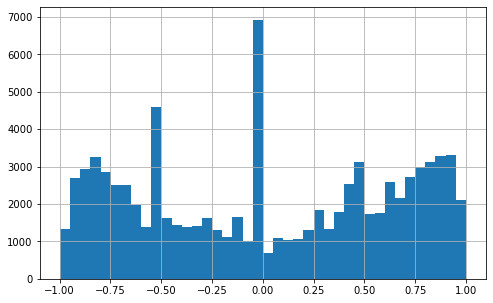

In [14]:
df['sentiment'].hist(bins=40, figsize = [8,5])
plt.show()

# **When do people talk about women's rights?**

#  How do people feel about women's rights and gender equality overall?

In [7]:
print(f'The dataframe used for overall sentiment contains {len(df)} quotations')

The dataframe used for overall sentiment contains 87161 quotations


In [21]:
#timeframe 
earliest = df['date'].sort_values()[0]
latest = df['date'].sort_values()[len(df)-1]

In [23]:
print(f'The quotations have been uttered between {earliest} and {latest}.')

The quotations have been uttered between 2015-03-09 12:30:00 and 2020-01-28 02:08:54.


#### Functions

In [65]:
def polarized_median(df):
    '''
    Description: split the dataset based on sentiment scores and calculate the median of positive and negative sentimetn scores distribution
    Input: dataframe with sentiment score in 'sentiment' column
    Output: medians of negative and positive sentiment scores distribution
    Requirements : -
    Use: - 
    '''
    #subsets dataframe sentiments
    lim = 0.33
    df_neg = df[df['sentiment']<-lim]
    df_pos = df[df['sentiment']>lim]
    df_neu = df[(df['sentiment']>-lim) & (df['sentiment']<lim)]
    neg_median = df_neg['sentiment'].describe()['50%']
    pos_median = df_pos['sentiment'].describe()['50%']
    return (neg_median,pos_median)

In [170]:
def plot_with_medians(df,ylimit):#separate three color
    '''
    Description: Plot of sentiment score distribution with split sentiments in neg, po, neutral categories with mediancs for pos and neg. 
    Input: dataframe with sentiment score in 'sentiment' column and y limit of plot 
    Output: Plot of sentiment score distribution with split sentiments in neg, po, neutral categories with mediancs for pos and neg. 
    Requirements : polarized_median function
    Use:  
    '''
    lim = 0.33
    df_neg = df[df['sentiment']<-lim]
    df_pos = df[df['sentiment']>lim]
    df_neu = df[(df['sentiment']>-lim) & (df['sentiment']<lim)]
    # Just write the name of the font
    mpl.rcParams['font.sans-serif'] = 'Lato'
    plt.rcParams['font.size'] = 15
    plt.rcParams["figure.figsize"] = (25,5)
    # Hide grid lines
    n = 20 
    ax1 = df_neg['sentiment'].hist(bins=n, figsize = [8,5],color ='#FF3A20')
    df_pos['sentiment'].hist(bins=n, figsize = [8,5],color='#4EA692')
    df_neu['sentiment'].hist(bins=n, figsize = [8,5],alpha=0.5,color='#58699D')#opacity low for neutral
    #limit 
    ax1.set_ylim(0,ylimit)
    #plt.box(False)#ax1.axis('off')
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(True)
    # Only show ticks on the left and bottom spines
    #ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    plt.grid(False)
    #get medians
    (neg_median,pos_median) = polarized_median(df)

    print(neg_median,pos_median)
    #OTHER COLOR BLUE 
    #58699D
    #vertical line to legend
    plt.axvline(x=neg_median, ymin=0, ymax=0.73,color = 'Gray')
    plt.axvline(x=pos_median, ymin=0, ymax=0.73,color = 'Gray')
    #legends on it
    plt.text(neg_median, ylimit*0.71, 'MEDIAN\n Negative ', fontsize=12)
    plt.text(pos_median, ylimit*0.71, 'MEDIAN\n Positive ', fontsize=12)
    fig1 = plt.gcf()
    plt.show()
    return fig1,neg_median,pos_median

## Overall 

-0.7003 0.7096


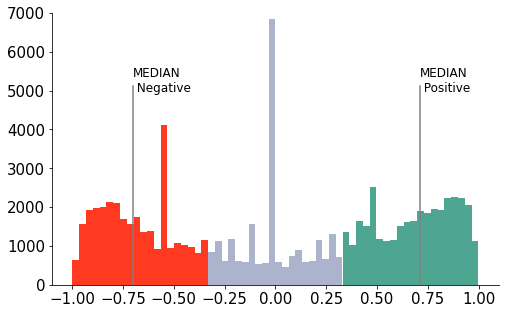

In [171]:
overall,ov_neg_median,ov_pos_median = plot_with_medians(df,7000)
overall.savefig("img/all_quotes_with_medians.png")

In [68]:
print(f'The medians are respectively at {ov_neg_median} on the negative side and {ov_pos_median} on the positive side')

The medians are respectively at -0.7003 on the negative side and 0.7096 on the positive side


In [74]:
#proportion calculation 
lim = 0.35
pos = len(df[df['sentiment']>lim])
neg = len(df[df['sentiment']<-lim]) 
df_neu = df[(df['sentiment']>-lim) & (df['sentiment']<lim)]
neu = len(df_neu)
ratio_overall =pos /neg #positive/negative ratio
ratio_neutral = neu/ (pos + neg + neu) * 100 #neutral/ otherratio
ratio_pos = pos/ (pos + neg + neu) * 100 #neutral/ otherratio
ratio_neg = neg/ (pos + neg + neu) * 100 #neutral/ otherratio
print(f'The ratio of positive to negative quotations is {ratio_overall}.')
print(f'The ratio of neutral to all quotations is {ratio_neutral}%.')
print(f'The ratio of positive to all quotations is {ratio_pos}%.')
print(f'The ratio of negative to all quotations is {ratio_neg}%.')

The ratio of positive to negative quotations is 1.0894900803410394.
The ratio of neutral to all quotations is 26.89253998485509%.
The ratio of positive to all quotations is 38.11927763372267%.
The ratio of negative to all quotations is 34.98818238142224%.


### Significance

#### Chi square test

We want to test the null hypothesis that the quotations are equally distributed, i.e.

$H_0: proportion_{negative} = proportion_{positive} = proportion_{neutral} = 0.33$

The alternative hypothesis is that at least one proportion is different.
We run a Pearsons' cumulative  test with 
 $𝜒^2=∑_{𝑖=1}^𝑛(𝑂_𝑖−𝐸_𝑖)^2/𝐸_𝑖$


In [116]:
ideal_ratio = 0.33
observed_neutral = ratio_neutral /100
observed_pos = ratio_pos /100
observed_neg = ratio_neg /100
chi_square = (((observed_neutral-ideal_ratio) * (observed_neutral-ideal_ratio))/ideal_ratio)
+(((observed_pos-ideal_ratio)*(observed_pos-ideal_ratio))/ideal_ratio)
+(((observed_neg-ideal_ratio)*(observed_neg-ideal_ratio))/ideal_ratio)
print(f'We have chi square equal to {chi_square} which is below the critical value {3.841} of chi square at a 0.05 level. Therefore the null hypothesis cannot be rejected and the proportions are distributed equally.')

We have chi square equal to 0.011303353889876933 which is below the critical value 3.841 of chi square at a 0.05 level. Therefore the null hypothesis cannot be rejected and the proportions are distributed equally.


####  T- test and  Mann-Whitney U test

The p-value is 27.578886965961676%, which is well above 5% thus we cannot reject the null hypothesis.
 Therefore the two means are equivalent. 


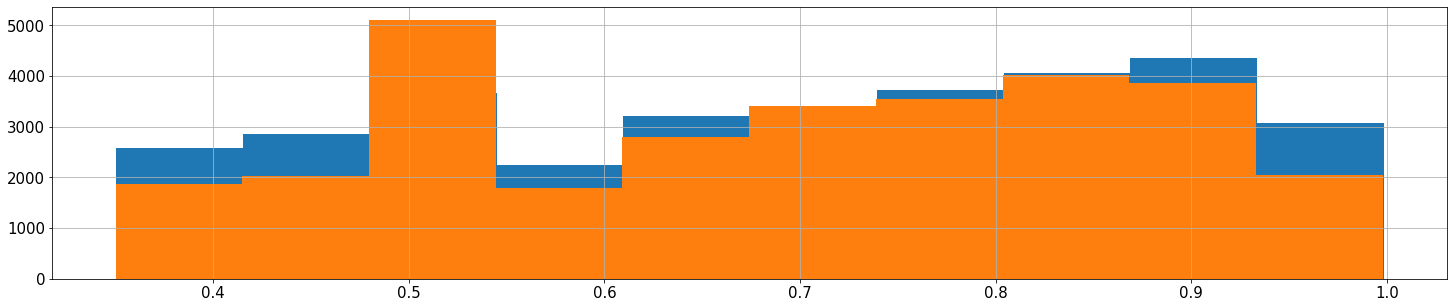

In [160]:
pos.hist()
neg.hist()
#by default the null hypothesis is that the two means are equals
#the alternative is that the means are not equalsa
res = scipy.stats.ttest_ind(pos,neg)
print(f'The p-value is {res[1]*100}%, which is well above 5% thus we cannot reject the null hypothesis.\n Therefore the two means are equivalent. ')

In [165]:
from scipy.stats import mannwhitneyu
res =mannwhitneyu(pos, neg)
print(f'The p-value is {res[1]*100}%, which is above 5% thus we cannot reject the null hypothesis.\n Therefore the two underlying distribution are equivalent. ')

The p-value is 6.430364929156446%, which is above 5% thus we cannot reject the null hypothesis.
 Therefore the two underlying distribution are equivalent. 


# How has Sentiment Evolved over time ?

### Overall Time analysis 

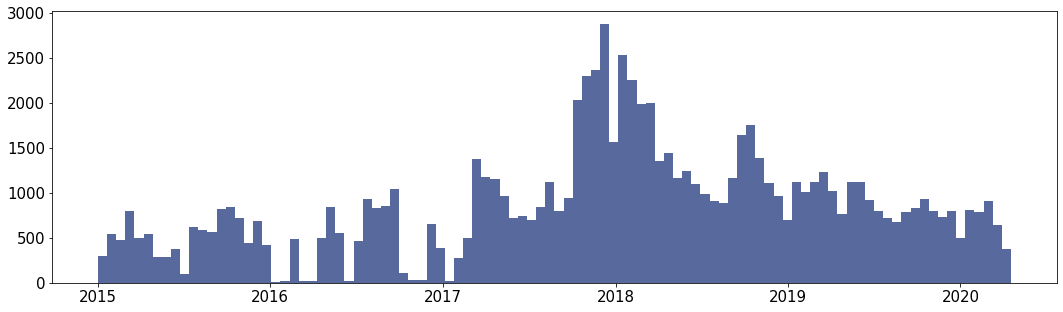

In [172]:
# all quotes in function of time
df['date'].hist(bins = 100, figsize = [18,5],color='#58699D',grid=False)
plt.show() 
# this graph should probably go into a general presentation of our data instead of here 

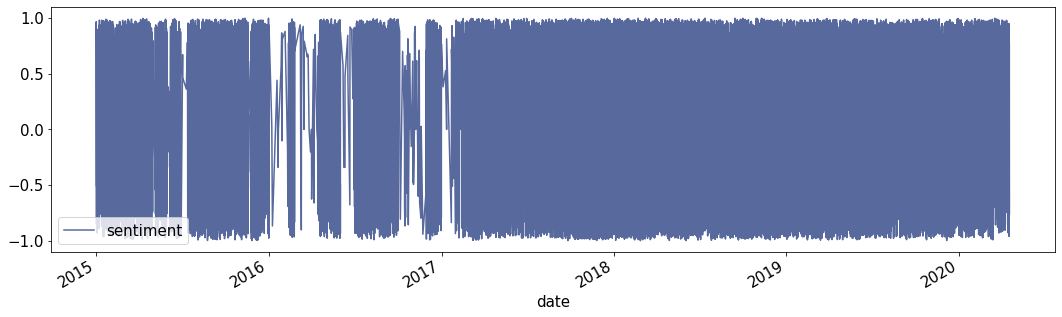

In [56]:
df.plot(x = 'date',y='sentiment', figsize = [18,5])
plt.show()
# not much info from this graph

#### Data plot over time with catergories (positive, negative, neutral)

In [176]:
len(df)

87161

In [177]:
# take a threshold and separate the data in two : 
# threshold choice currently partly arbitrary
df_positive = df.query('sentiment > 0.33')
df_negative = df.query('sentiment < -0.33')
df_neutral  = df.query('sentiment > -0.33').query('sentiment < 0.33')

In [178]:
# Create an array with the colors you want to use
colors = ["#FF0B04", "#4374B3"]
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

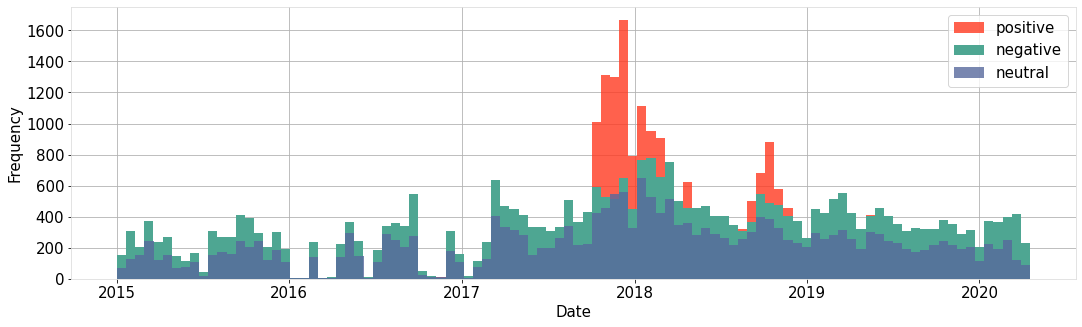

In [179]:
fig, ax = plt.subplots()
# Just write the name of the font
mpl.rcParams['font.sans-serif'] = 'Lato'
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = (25,5)

#plot parameters
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
ax.set_axisbelow(True) # set grid lines behind

#histograms
df_negative['date'].hist(bins = 100, figsize = [18,5],alpha = 0.8,color ='#FF3A20')
df_positive['date'].hist(bins = 100, figsize = [18,5],color='#4EA692')
df_neutral['date'].hist(bins = 100, figsize = [18,5],alpha = 0.8,color='#58699D')

#plotting parameters
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(labels=('positive','negative','neutral'))
plt.savefig("./img/sentiment_time_pos_neg_neu.jpg",dpi=400,bbox_inches='tight')
plt.show()

#### Distribution of sentiment scores over time 

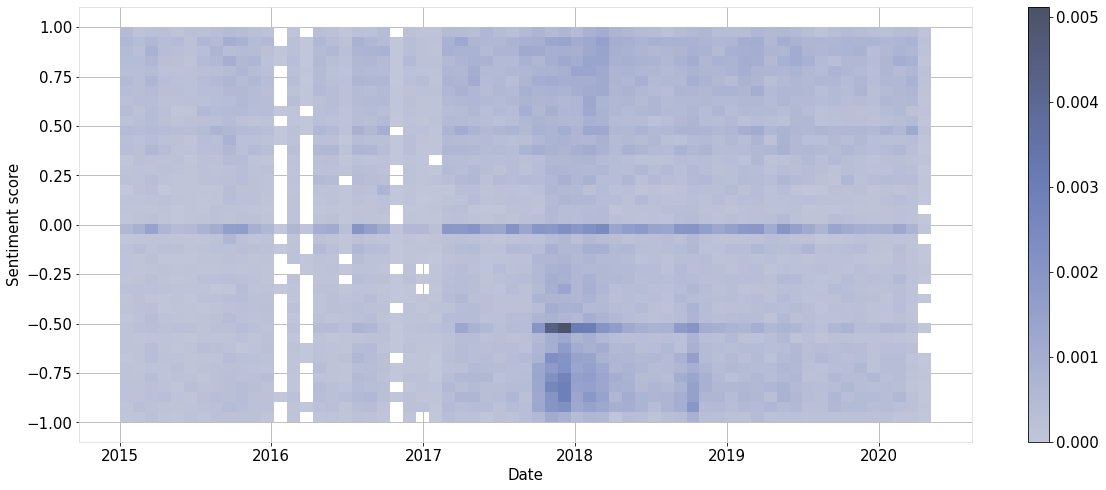

In [44]:
fig, ax = plt.subplots()
ax = sns.histplot(df[['date','sentiment']], x="date", y="sentiment", 
                  stat='proportion',cbar=True,binwidth=(31,0.05)) # `count` `frequency`
mpl.rcParams['font.sans-serif'] = 'Lato' # Just write the name of the font
plt.rcParams['font.size'] = 15

fig.set_size_inches(20,8)
#plt.figure(figsize=(20,8))

ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.xlabel('Date')
plt.ylabel('Sentiment score')

#ax.set_visible(False)

plt.grid(visible=True)
ax.set_axisbelow(True) # set grid lines behind
plt.savefig("./img/sentiment_heatmap.jpg",dpi=400,bbox_inches='tight')
plt.show()

# Ratio per year with CI

In [190]:
import warnings
warnings.filterwarnings('ignore')

### Functions

In [192]:
#function splitting years
def split_years(dt):
    '''
    Description: split the dataset based on years
    Input: dataframe with date
    Output: dataframes by year
    Requirements : -
    Use: - 
    '''
    dt['year'] = dt['date'].dt.year
    return [dt[dt['year'] == y] for y in dt['year'].unique()]

#pos, neg, neu dataframe split by years for further analysis
df_positive_per_year = split_years(df_positive)
df_negative_per_year = split_years(df_negative)
df_neutral_per_year = split_years(df_neutral)

In [194]:
def percentage_df(df_pos,df_neg,df_neu):
    '''
    Description: compute the percentage of quotations from each categories (pos, neg, neu)
    Input: dataframes split by sentiment scores categories
    Output: dataframes with year and percentage of each categories. Note that the confidence intervals columns are still empty at this point 
    Requirements : -
    Use: - 
    '''
    #empty dataframes with columns for further incoming confidence intervals
    per_year_df = pd.DataFrame(columns=['year','positive percentage','pos ci_min','pos ci_max','negative percentage','neg ci_min','neg ci_max','neutral percentage','neu ci_min','neu ci_max'])
    for i in range(6):
        #numbers of quotations per sentiment categories
        len_pos = len(df_pos[i]) 
        len_neg = len(df_neg[i])
        len_neu = len(df_neu[i])
        tot = len_neg + len_pos + len_neu
        #new dataframe with percentage 
        per_year_df = per_year_df.append({
            'year':(df_pos[i]['year'].unique())[0],
            'positive percentage':len_pos/tot *100,
             'negative percentage':len_neg/tot *100,
             'neutral percentage':len_neu/tot *100,
            },ignore_index=True)
        
    return per_year_df
per_year_df = percentage_df(df_positive_per_year,df_negative_per_year,df_neutral_per_year)
per_year_df.head()

,year,positive percentage,pos ci_min,pos ci_max,negative percentage,neg ci_min,neg ci_max,neutral percentage,neu ci_min,neu ci_max
0,2015.0,46.217722,NaN,NaN,24.668354,NaN,NaN,29.113924,NaN,NaN
1,2016.0,43.143040,NaN,NaN,27.055805,NaN,NaN,29.801155,NaN,NaN
2,2017.0,33.650606,NaN,NaN,40.727753,NaN,NaN,25.621641,NaN,NaN
3,2018.0,33.892467,NaN,NaN,40.070391,NaN,NaN,26.037142,NaN,NaN
4,2019.0,41.056359,NaN,NaN,31.472411,NaN,NaN,27.471230,NaN,NaN


#### Bootstrapping

In [195]:
df_all_boots = pd.DataFrame(columns=['year','positive percentage','negative percentage','neutral percentage'])

# scikit-learn bootstrap
from sklearn.utils import resample
#Choose a number of bootstrap samples to perform 
boot_numbers = 200
#Choose a sample size
n = 150000#10000
#For each bootstrap sample
for i in range(boot_numbers):
    #draw a sample with replacement with the chose size
    # prepare bootstrap sample
    boot = resample(df, replace=True, n_samples = n)
    df_boot_positive = boot.query('sentiment > 0.35')
    df_boot_negative = boot.query('sentiment < -0.35')
    df_boot_neutral  = boot.query('sentiment > -0.35').query('sentiment < 0.35')
    
    #categorize per year
    df_positive_per_year = split_years(df_boot_positive)
    df_negative_per_year = split_years(df_boot_negative)
    df_neutral_per_year = split_years(df_boot_neutral)
    df_boot = percentage_df(df_positive_per_year,df_negative_per_year,df_neutral_per_year)
    df_all_boots = df_all_boots.append(df_boot)

df_all_boots.head()

,year,positive percentage,negative percentage,neutral percentage,pos ci_min,pos ci_max,neg ci_min,neg ci_max,neu ci_min,neu ci_max
0,2019.0,32.454317,41.266971,26.278712,NaN,NaN,NaN,NaN,NaN,NaN
1,2015.0,26.290536,60.595632,13.113832,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,34.795900,54.642450,10.561650,NaN,NaN,NaN,NaN,NaN,NaN
3,2017.0,44.740101,12.600403,42.659495,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,63.523744,16.894053,19.582203,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
years = [2015.0,2016.0,2017.0,2018.0,2019.0,2020.0]
#Dataframe that will contains the CI
final = pd.DataFrame()

#For each subset of dataframe
for year in years :
    tmp = per_year_df[per_year_df['year']==year]
    df_year = df_all_boots[df_all_boots['year']==year]
    stats = df_year.describe()['positive percentage']
    n = np.sqrt(boot_numbers)
    
    #positive
    ci_minus = - (1.96 * stats.loc['std']/n)
    ci_plus =  + (1.96 * stats.loc['std']/n)
    tmp['pos ci_min'] = ci_minus
    tmp['pos ci_max'] = ci_plus
    
    #negativ
    ci_minus = - (1.96 * stats.loc['std'] /n)
    ci_plus = + (1.96 * stats.loc['std'] /n)
    tmp['neg ci_min'] = ci_minus
    tmp['neg ci_max'] = ci_plus
   
    #neutral
    ci_minus =  - (1.96 * stats.loc['std'] /n)
    ci_plus =  + (1.96 * stats.loc['std'] /n)
    tmp['neu ci_min'] = ci_minus
    tmp['neu ci_max'] = ci_plus
    final = final.append(tmp)

In [219]:
final

,year,positive percentage,pos ci_min,pos ci_max,negative percentage,neg ci_min,neg ci_max,neutral percentage,neu ci_min,neu ci_max
0,2015.0,46.217722,-1.890745,1.890745,24.668354,-1.890745,1.890745,29.113924,-1.890745,1.890745
1,2016.0,43.143040,-1.981781,1.981781,27.055805,-1.981781,1.981781,29.801155,-1.981781,1.981781
2,2017.0,33.650606,-1.832301,1.832301,40.727753,-1.832301,1.832301,25.621641,-1.832301,1.832301
3,2018.0,33.892467,-1.503130,1.503130,40.070391,-1.503130,1.503130,26.037142,-1.503130,1.503130
4,2019.0,41.056359,-1.870398,1.870398,31.472411,-1.870398,1.870398,27.471230,-1.870398,1.870398
5,2020.0,48.981171,-1.628632,1.628632,25.070931,-1.628632,1.628632,25.947898,-1.628632,1.628632


Example plot

In [200]:
final_pos = final[['year','positive percentage']]

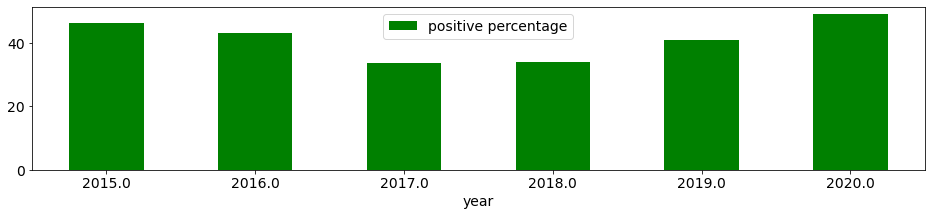

In [201]:
err_pos = final['pos ci_max']
err_pos
ax = final_pos.plot.bar(x='year', y='positive percentage', rot=0,color = 'Green',yerr=err_pos)

In [269]:
# formatting of year for plotting 
final['year']=final['year'].apply(lambda x: f'{x:.0f}')

['Lato']


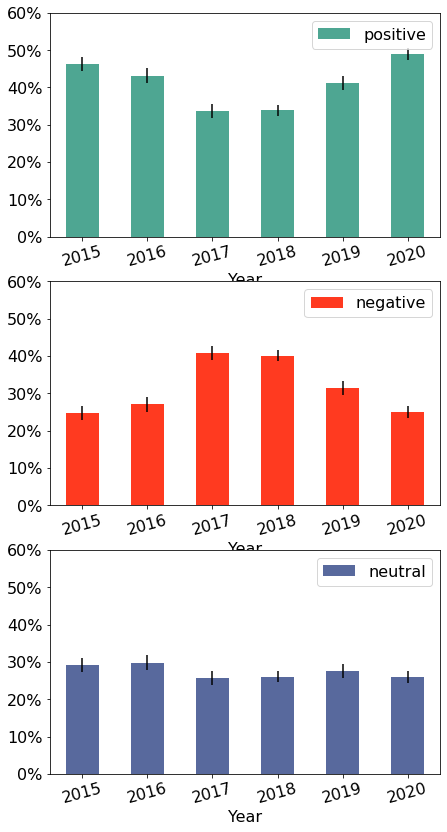

In [273]:
# Nice plotting
from matplotlib.ticker import PercentFormatter

# Just write the name of the font
mpl.rcParams['font.sans-serif'] = 'Lato'
print(mpl.rcParams['font.sans-serif'])
mpl.rcParams['font.size'] = 16
mpl.rcParams["figure.figsize"] = (7,14)

fig, axes = plt.subplots(nrows=3, ncols=1)

ax1 = final.plot.bar(ax=axes[0],x='year', y='positive percentage', rot=15,color = '#4EA692',yerr=[final['pos ci_max']],legend='test',xlabel = 'Year',ylim=(0,60))
ax2 = final.plot.bar(ax=axes[1],x='year', y='negative percentage', rot=15,color = '#FF3A20',yerr=[final['neg ci_max']],xlabel = 'Year',ylim=(0,60))
ax3 = final.plot.bar(ax=axes[2],x='year', y='neutral percentage', rot=15,color = '#58699D',yerr=[final['neu ci_max']],xlabel = 'Year',ylim=(0,60))
ax1.legend(["positive"]);
ax2.legend(["negative"]);
ax3.legend(["neutral"]);
ax1.yaxis.set_major_formatter(PercentFormatter())
ax2.yaxis.set_major_formatter(PercentFormatter())
ax3.yaxis.set_major_formatter(PercentFormatter())
plt.show()
fig.tight_layout()
fig.savefig('img/byyear_sentiment_barplot.png')

# Are peaks in sentiment related to political or social events ?

In [227]:
# Select the negatives quotes the last two months of 2017
end_2017_df = df[ (df['date'] > '2017-11-01') & (df['date'] < '2018-01-31')]
# #negative sentiments
neg_end_2017_df = end_2017_df[end_2017_df['sentiment']<-0.5]

Plotting to compare with reference state

-0.7003 0.7096


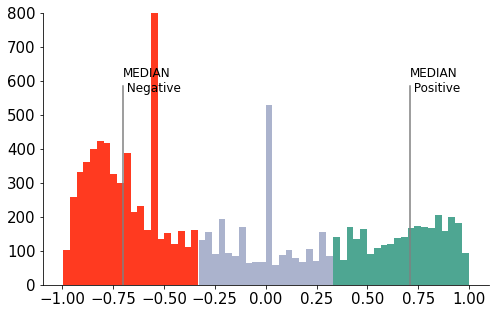

(-0.7003, 0.7096)

In [232]:
#plt.axvline(x=neg_median, ymin=0, ymax=0.73,color = 'Black')
#plt.axvline(x=pos_median, ymin=0, ymax=0.73,color = 'Black')
end2017,end2017_neg_median,end2017_pos_median  = plot_with_medians(end_2017_df,800)
end2017.savefig('img/end_2017_quotes_with_medians.png')
polarized_median(end_2017_df)

In [235]:
#proportion calculation 
lim = 0.35
pos = len(end_2017_df[end_2017_df['sentiment']>lim])
neg = len(end_2017_df[end_2017_df['sentiment']<-lim]) 
df_neu = end_2017_df[(end_2017_df['sentiment']>-lim) & (end_2017_df['sentiment']<lim)]
neu = len(df_neu)
ratio_overall =pos /neg #positive/negative ratio
ratio_neutral = neu/ (pos + neg + neu) * 100 #neutral/ otherratio
ratio_pos = pos/ (pos + neg + neu) * 100 #neutral/ otherratio
ratio_neg = neg/ (pos + neg + neu) * 100 #neutral/ otherratio
print(f'The ratio of positive to negative quotations is {ratio_overall}.')
print(f'The ratio of neutral to all quotations is {ratio_neutral}%.')
print(f'The ratio of positive to all quotations is {ratio_pos}%.')
print(f'The ratio of negative to all quotations is {ratio_neg}%.')

The ratio of positive to negative quotations is 0.49903694624409034.
The ratio of neutral to all quotations is 23.39149888143177%.
The ratio of positive to all quotations is 25.503355704697988%.
The ratio of negative to all quotations is 51.10514541387025%.


### Topic categorization with manual categories

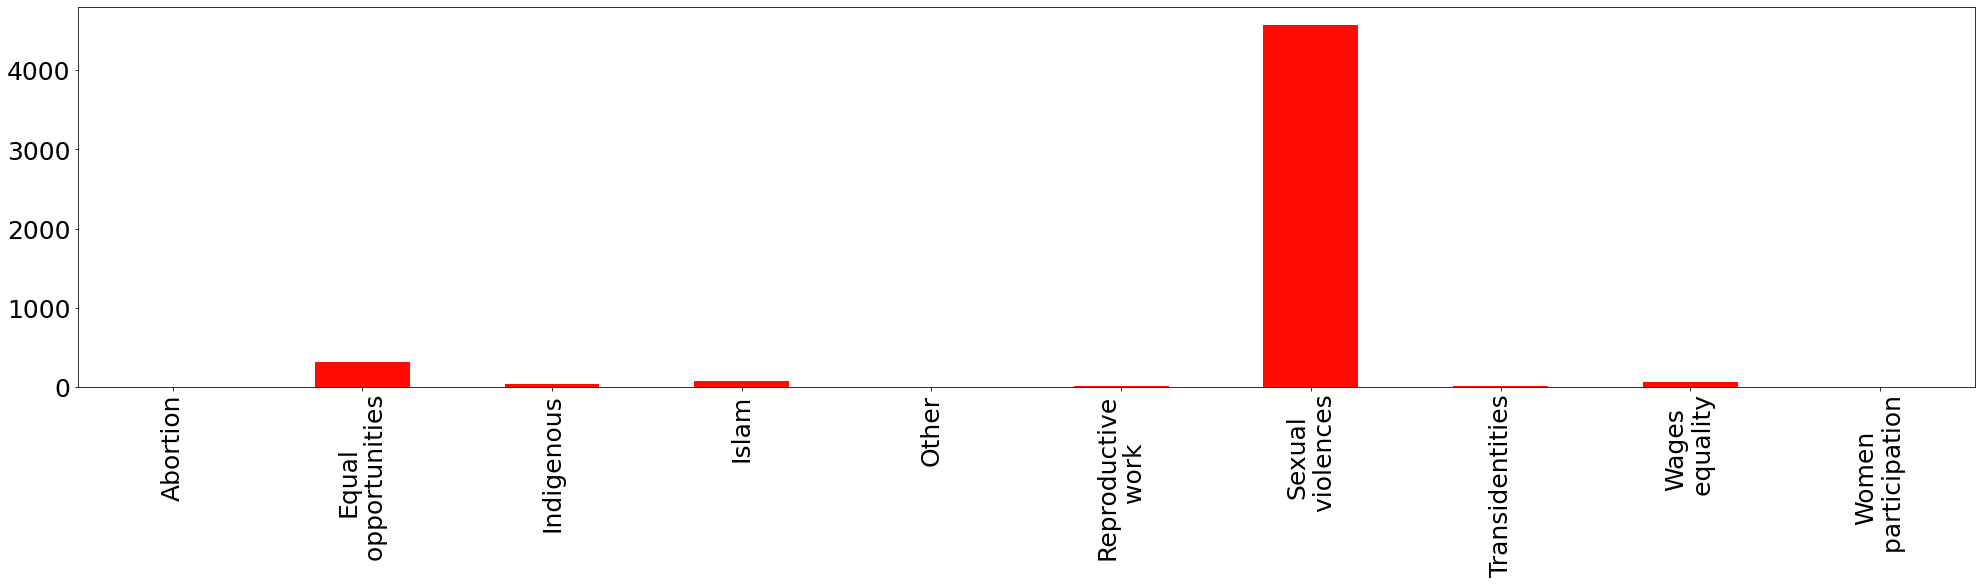

In [242]:
#The subset of negative quotes for the time period from December 2017 to Ferbuary 2018 (excluded)
neg_end_2017_df['subtopic'].value_counts().sort_index().plot.bar(x='Target Value', y='Number of Occurrences')
plt.savefig("./img/sentiment_categ.jpg",dpi=400)

In [243]:
values = neg_end_2017_df['subtopic'].value_counts()
maj=values.iloc[0]
tot = neg_end_2017_df['subtopic'].value_counts().sum()
print(f'The percentage of quotations that are in the majoritary topic is {maj/tot*100}')

The percentage of quotations that are in the majoritary topic is 89.74308687978035


### NLP on subset of quotations

In [247]:
#select only date and quotation 
neg_end_2017_df[['date','quotation']]
#clean the whitespace
df["clean_quotation"] = neg_end_2017_df['quotation'].str.lower().str.replace('[^\w\s]','')
#calculate the frequency of words
new_df = df.clean_quotation.str.split(expand=True).stack().value_counts().reset_index()

In [248]:
new_df.columns = ['Word', 'Frequency'] 
new_df.head()

,Word,Frequency
0,the,7515
1,and,6137
2,of,5619
3,sexual,5397
4,to,5324


In [250]:
new = new_df[~new_df['Word'].isin(stopwords)].head(5)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


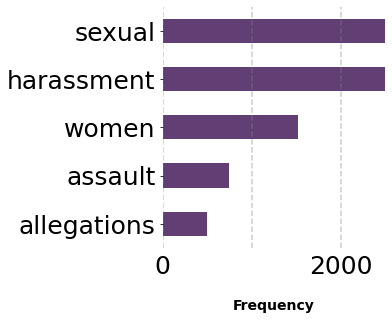

In [251]:
new = new.sort_values(by='Frequency',ascending = True)

# # Just write the name of the font
plt.rcParams["figure.figsize"] = (6,5)
from matplotlib.ticker import StrMethodFormatter
ax = new.plot.barh(x='Word', y='Frequency', rot=0,color = '#613F75', xlabel='',xlim = (0,2500))

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#ax.ticks['bottom'].set_visible(False)
# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='Gray', zorder=1)

# Set x-axis label
ax.set_xlabel("Frequency", labelpad=20, weight='bold', size=14)

# Set y-axis label
ax.set_ylabel("", labelpad=20, weight='bold', size=14)
plt.tick_params(bottom = False)
plt.tick_params(top = False)
plt.tick_params(right = False)
ax.get_legend().remove()

plt.tight_layout()
plt.savefig('img/5_most_common_word_event.png')

In [252]:
new_df[~new_df['Word'].isin(stopwords)].head(50)

,Word,Frequency
3,sexual,5397
5,harassment,5022
13,women,1520
29,assault,750
46,allegations,494
48,men,451
52,abuse,410
55,people,397
56,violence,395
57,workplace,386


In [253]:
neg_end_2017_df[['date','quotation']].sample(n=3, random_state=9)

,date,quotation
26390,2017-12-18 16:44:39,"The basic application can be used to address a variety of issues, including things like sexual harassment complaints."
27189,2017-12-06 15:31:16,"We know this about sexual harassment, sexual abuse, rape -- that really these behaviors are about power more than sex per se,"
41018,2018-01-18 08:47:00,"I have never been a victim of sexual harassment. And I thought it was nice to be told that I was beautiful or that I had a nice little ass. This kind of compliment is nice. But there are many actresses who flirt with producers to get a role. Then, so that we talk about them, they say that they have been harassed... In reality, rather than benef..."


In [257]:
trump_subset = neg_end_2017_df[neg_end_2017_df['quotation'].str.contains('Trump')]['quotation']
len(trump_subset)


103

In [260]:
trump_subset.head(30)

18000                                                                                          NEW: Women who have publicly accused President Trump of sexual harassment and assault will speak at a news conference, hosted by @bravenewfilms, Monday at 10:30 a.m. ET. The women are calling for an investigation by Congress of sexual misconduct by the president.
18010    It's the -- it's like a weaponization, political weaponization of sexual harassment. And it's just the height of cynicism and it's not -- honestly, that's what I would expect from Donald Trump. And it's what you expect from Sean Hannity. But it's not just them. It's Mitch McConnell, who was very quick to call for an ethics investigation of Sena...
18465                                                                                                                                                                                                                                               The confrontation with Trump elevated 

In [263]:
len(end_2017_df)

11176

# Comparing sentiment analysis tools:

In [4]:
quote = df['quotation'].iloc[0]

Vader : Gives a compound score from -1 to 1 ranging from negativity to positivity.

In [5]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(df['quotation'].loc[1])

In [6]:
# example use :
analyzer.polarity_scores(quote)['compound']


0.6271

In [7]:
analyzer.polarity_scores(quote)

{'neg': 0.097, 'neu': 0.697, 'pos': 0.205, 'compound': 0.6271}

Text blob :

In [8]:
from textblob import TextBlob

# polarity score function :
def polarity_blob(text):
    return TextBlob(text).sentiment.polarity

# subjectivity score function :
def subjectivity_blob(text):
    return TextBlob(text).sentiment.subjectivity

In [9]:
# example use :
polarity_blob(quote)

0.2532828282828283

In [10]:
TextBlob(quote).sentiment

Sentiment(polarity=0.2532828282828283, subjectivity=0.5868686868686869)

Flair : A more advandced model that uses pretrained RNNs and pretrained text embeddings: 

source : https://github.com/flairNLP/flair/pull/1613

In [11]:
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence

In [12]:
# load tagger ( this could take a while, it's approx ~1 gb to download)
classifier = TextClassifier.load('sentiment-fast')

def flair_label(text = 'test text'):
    sentence = Sentence(text)
    classifier.predict(sentence)
    return sentence.labels[0].score

2021-12-17 19:58:46,836 loading file C:\Users\Younes\.flair\models\sentiment-en-mix-ft-rnn_v8.pt


In [13]:
# example use :
test = Sentence("enormously entertaining for moviegoers of any age .")
classifier.predict(test)
print(test.labels)
print(flair_label(text = "enormously entertaining for moviegoers of any age .")) 

[POSITIVE (0.9987)]
0.9987253546714783


Reloading the dataframe of selected quotations, with only the rows that have QIDS ( and that has been enriched using the parquet file): 

In [61]:
df = pd.read_pickle(PATH_GENERATED_DATA+'df_enriched.pkl', compression='infer', storage_options=None)

We then use all three sentiment analysis tools on our quotes :

Vader

In [14]:
df['sentiment_vader'] = df['quotation'].apply(lambda x : analyzer.polarity_scores(x)['compound'])

In [15]:
df['sentiment_vader'].head()

0    0.6271
1    0.9460
2    0.4111
3    0.5994
4   -0.8020
Name: sentiment_vader, dtype: float64

Text blob

In [16]:
df['sentiment_blob'] = df['quotation'].apply(lambda x : polarity_blob(x)) 

In [17]:
df['sentiment_blob'].head()

0    0.253283
1    0.120000
2    0.135500
3   -0.022917
4    0.111111
Name: sentiment_blob, dtype: float64

Flair 

In [18]:
df['sentiment_flair'] = df['quotation'].apply(lambda x : flair_label(x))  # takes approx 15 minutes to run

In [22]:
df['sentiment_flair'].head()

0    0.766071
1    0.989518
2    0.678619
3    0.546759
4    0.991872
Name: sentiment_flair, dtype: float64

In [23]:
df_sentiment = df[['quotation','sentiment_vader','sentiment_blob','sentiment_flair']]
df_sentiment.head(30)

,quotation,sentiment_vader,sentiment_blob,sentiment_flair
0,Anything less than women winning 50 per cent of new seats will be a loss not only for a progressive city's progress towards true gender equality but it would also be a loss for good governance in the ACT.,0.6271,0.253283,0.766071
1,"I'd like to congratulate all the winners and finalists on their success. They have demonstrated clear leadership by moving women's progression from a `diversity' initiative to a core business priority. Achieving gender equality is only possible when men and women work together at every level, creating real change.",0.9460,0.120000,0.989518
2,"I think what Deepika has spoken in the video makes sense. I do understand the counter argument too where everyone has been saying that had men said the same lines about having sex outside marriage being their choice, they would have been branded idiots or ass **** s. However, we still do have a clear cut demarcation or boundary as to what men a...",0.4111,0.135500,0.678619
3,"if advocating for equal pay for equal work is playing the gender card, deal me in. I am ready to play as hard as I can.",0.5994,-0.022917,0.546759
4,"Men and women are understandably upset if they see a company close down and jobs lost. It's only natural people would look around and in their distress they find something or someone able to blame,",-0.8020,0.111111,0.991872
5,She's the new paradigm that represents a feminine power that is palpable -- a modern maverick among women and men.,0.0000,0.112121,0.998887
6,"We are expecting 20-22 cueists from India for different events. We are not sure about their women's participation,",-0.2411,-0.125000,0.942354
7,"The apex court has upheld an earlier verdict of a family court granting maintenance allowance to Muslim women even after the `iddat' period (three months and 10 days after the divorce),",0.4404,0.000000,0.530047
8,"The incidents of rape and sexual harassment are being taken place one after another, but those responsible for the crimes go unpunished. They're beyond touch.",-0.2846,0.350000,0.722543
9,"then I can promise you that lawyers in almost any case where a law discriminates against gay people will make the argument that the law constitutes unconstitutional sex discrimination,",-0.0516,0.416667,0.677893


In [25]:
# Save the dataframe containing the sentiment scores 
df_sentiment.to_pickle(PATH+'df_enriched_w_sentiment_allscores.pkl', compression='infer', protocol=5, storage_options=None)

In [60]:
# Load the dataframe containing sentiment scores
df_sentiment = pd.read_pickle(PATH+'df_enriched_w_sentiment_allscores.pkl', compression='infer', storage_options=None)

In [61]:
df_sentiment.describe()

,sentiment_vader,sentiment_blob,sentiment_flair
count,87161.000000,87161.000000,87161.000000
mean,0.021996,0.164109,0.883739
std,0.618914,0.218778,0.140334
min,-0.997900,-1.000000,0.500033
25%,-0.542300,0.000000,0.810222
50%,0.000000,0.145833,0.952602
75%,0.611600,0.300000,0.991984
max,0.998500,1.000000,0.999998


We can see that vader and sentiment blob seem to give an average score that is closer to the 0 ( which we could consider as neutral) versus flair that on average gives values closer to the positive side

In [73]:
def tf_score(x, algo='vader'):
    if algo=='vader' or algo=='textblob':
        if x>=0:
            x = 1
        else:
            x = 0

    if algo=='flair':    
        if x>=0.5:
            x = 1
        else:
            x = 0
    return x

To compare the results we use threshold defined in the function `tf_score`:

In [74]:
df_sentiment['sentiment_vader_b'] = df_sentiment['sentiment_vader'].apply(lambda x : tf_score(x, algo='vader')).copy()
df_sentiment['sentiment_blob_b'] = df_sentiment['sentiment_blob'].apply(lambda x : tf_score(x, algo='textblob')).copy()
df_sentiment['sentiment_flair_b'] = df_sentiment['sentiment_flair'].apply(lambda x : tf_score(x, algo='flair')).copy()

In [75]:
df_sentiment[['sentiment_vader_b','sentiment_blob_b','sentiment_flair_b']]

,sentiment_vader_b,sentiment_blob_b,sentiment_flair_b
0,1,1,1
1,1,1,1
2,1,1,1
3,1,0,1
4,0,1,1
...,...,...,...
87156,0,1,1
87157,1,1,1
87158,1,1,1
87159,1,1,1


In [76]:
((df_sentiment['sentiment_vader_b']==df_sentiment['sentiment_blob_b'])&(df_sentiment['sentiment_vader_b']==df_sentiment['sentiment_flair_b'])).sum()/len(df_sentiment)

0.4964490999414876

In [77]:
((df_sentiment['sentiment_vader_b']==df_sentiment['sentiment_blob_b'])).sum()/len(df_sentiment)

0.5702665182822593

In [78]:
((df_sentiment['sentiment_vader_b']==df_sentiment['sentiment_flair_b'])).sum()/len(df_sentiment)

0.5500740009866798

It would seem like the different sentiment classification tools don't give the same kind of answer/ or score, this is perhaps caused by the fact that they were trained on different datasets and not necessarily for our exact task. Although, the method we used to compare them here is very simple, maybe it would be more fair if they were trained on the same dataset, and if we used different threshold to decide wether the score was positive or negative.